<a href="https://colab.research.google.com/github/roneisimoes/provaBDDAcolab/blob/main/provaFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando bibliotecas

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Carregando dataset

colunas = ['id', 'Diagnóstico']

caracteristicas = [
                                     'Raio',
                                     'Textura',
                                     'perímetro',
                                     'Área',
                                     'Suavidade',
                                     'Estanqueidade',
                                     'Concavidade',
                                     'junta côncava',
                                     'simetria', 
                                     'Dimensão fractal'
                                     ]

for a in range(3):
  for b in caracteristicas:
    colunas.append(f"{a}.{b}")

df = pd.read_csv("wdbc.data", names=colunas )

df.head()

,id,Diagnóstico,0.Raio,0.Textura,0.perímetro,0.Área,0.Suavidade,0.Estanqueidade,0.Concavidade,0.junta côncava,...,2.Raio,2.Textura,2.perímetro,2.Área,2.Suavidade,2.Estanqueidade,2.Concavidade,2.junta côncava,2.simetria,2.Dimensão fractal
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Verificando a quantidade de registros e colunas o dataset possui.

df.shape

(569, 32)

In [ ]:
#Verificamos se existe alguma coluna com registros vazios para exclusão

df.isna().sum()

id                    0
Diagnóstico           0
0.Raio                0
0.Textura             0
0.perímetro           0
0.Área                0
0.Suavidade           0
0.Estanqueidade       0
0.Concavidade         0
0.junta côncava       0
0.simetria            0
0.Dimensão fractal    0
1.Raio                0
1.Textura             0
1.perímetro           0
1.Área                0
1.Suavidade           0
1.Estanqueidade       0
1.Concavidade         0
1.junta côncava       0
1.simetria            0
1.Dimensão fractal    0
2.Raio                0
2.Textura             0
2.perímetro           0
2.Área                0
2.Suavidade           0
2.Estanqueidade       0
2.Concavidade         0
2.junta côncava       0
2.simetria            0
2.Dimensão fractal    0
dtype: int64

In [ ]:
#analizamos a quantidade de registros de diagnosticos do tipo M ou B

df['Diagnóstico'].value_counts()

B    357
M    212
Name: Diagnóstico, dtype: int64

In [ ]:
#vemos os tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  569 non-null    int64  
 1   Diagnóstico         569 non-null    object 
 2   0.Raio              569 non-null    float64
 3   0.Textura           569 non-null    float64
 4   0.perímetro         569 non-null    float64
 5   0.Área              569 non-null    float64
 6   0.Suavidade         569 non-null    float64
 7   0.Estanqueidade     569 non-null    float64
 8   0.Concavidade       569 non-null    float64
 9   0.junta côncava     569 non-null    float64
 10  0.simetria          569 non-null    float64
 11  0.Dimensão fractal  569 non-null    float64
 12  1.Raio              569 non-null    float64
 13  1.Textura           569 non-null    float64
 14  1.perímetro         569 non-null    float64
 15  1.Área              569 non-null    float64
 16  1.Suavid

In [ ]:
#Deletamos a coluna ID, pois a mesma não é relevante para a analise do dataset.

df = df.drop(columns=["id"])
df.head()

,Diagnóstico,0.Raio,0.Textura,0.perímetro,0.Área,0.Suavidade,0.Estanqueidade,0.Concavidade,0.junta côncava,0.simetria,...,2.Raio,2.Textura,2.perímetro,2.Área,2.Suavidade,2.Estanqueidade,2.Concavidade,2.junta côncava,2.simetria,2.Dimensão fractal
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Tranformamos a coluna dignostico em numerica

mapa = {
    'B': 0,
    'M': 1, 
}

df['Diagnóstico'] = df['Diagnóstico'].map(mapa)
df.head()

,Diagnóstico,0.Raio,0.Textura,0.perímetro,0.Área,0.Suavidade,0.Estanqueidade,0.Concavidade,0.junta côncava,0.simetria,...,2.Raio,2.Textura,2.perímetro,2.Área,2.Suavidade,2.Estanqueidade,2.Concavidade,2.junta côncava,2.simetria,2.Dimensão fractal
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


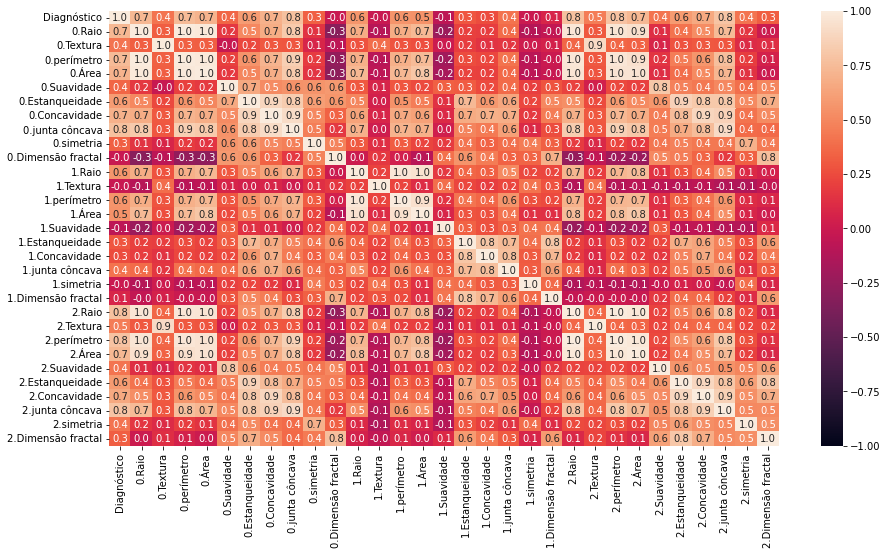

In [ ]:
#analisamos as correlações

plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), vmin=-1, annot=True, fmt=".1f")

In [ ]:
# Separação em treino e teste

from sklearn.model_selection import train_test_split

Xtreino, Xteste, ytreino, yteste = train_test_split(
    df[['0.Área',	'0.Concavidade']], df['Diagnóstico'], test_size=.3,
    stratify=df['Diagnóstico'], random_state=0)

ytreino


436    0
181    1
165    0
392    1
404    0
      ..
145    0
564    1
301    0
314    0
396    0
Name: Diagnóstico, Length: 398, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xtreino = ss.fit_transform(Xtreino)
Xteste = ss.fit_transform(Xteste)

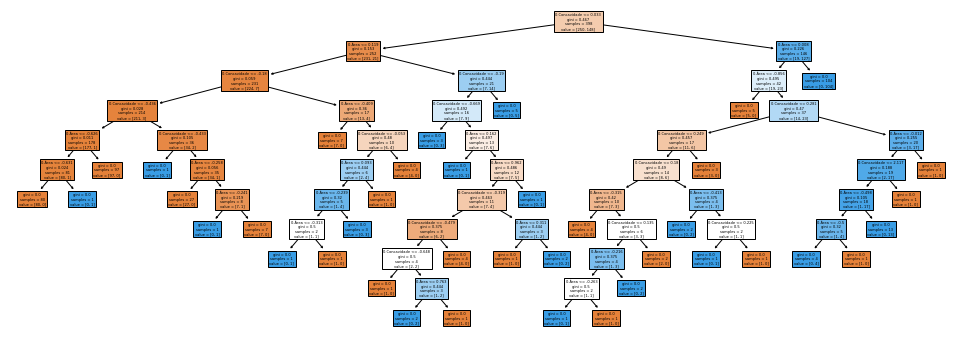

In [ ]:
#Treinamento do modelo com Árvore de Decisão

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(Xtreino, ytreino)

plt.rcParams['figure.figsize'] = (17, 6)
plot_tree(dtc, filled=True, 
          feature_names=['0.Área',	'0.Concavidade']);

In [ ]:
#Verificar importância de cada coluna

fn = ['0.Área',	'0.Concavidade']
for nome, importancia in zip(fn, dtc.feature_importances_):
    print(f"Nome: {nome} - Importância: {importancia}")

Nome: 0.Área - Importância: 0.2678619098579521
Nome: 0.Concavidade - Importância: 0.7321380901420479


In [ ]:
# Utilizaremos a métrica de acurácia para treino e teste.
# calcular 5 vezes para cada definição de profundidade máxima
from sklearn.metrics import accuracy_score

acc_treino = {}
acc_teste = {}

for profundidade in range(1, 30):
    acc_treino[profundidade] = []
    acc_teste[profundidade] = []

    for rs in range(0, 5):
        Xtreino, Xteste, ytreino, yteste = train_test_split(
            df[['0.Área',	'0.Concavidade']], df['Diagnóstico'], test_size=.3,
            stratify=df['Diagnóstico'], random_state=rs)
        
        ss = StandardScaler()
        Xtreino = ss.fit_transform(Xtreino)
        Xteste = ss.transform(Xteste)

        dtc = DecisionTreeClassifier(random_state=rs, 
                                     max_depth=profundidade)
        dtc.fit(Xtreino, ytreino)

        y_pred_treino = dtc.predict(Xtreino)
        acc_treino[profundidade].append(
            accuracy_score(ytreino, y_pred_treino)
        )

        y_pred_teste = dtc.predict(Xteste)
        acc_teste[profundidade].append(
            accuracy_score(yteste, y_pred_teste)
        )

In [ ]:
acc_treino

{1: [0.8994974874371859,
  0.8969849246231156,
  0.8969849246231156,
  0.8944723618090452,
  0.907035175879397],
 2: [0.9170854271356784,
  0.9095477386934674,
  0.9246231155778895,
  0.9195979899497487,
  0.9447236180904522],
 3: [0.9296482412060302,
  0.9321608040201005,
  0.9447236180904522,
  0.9346733668341709,
  0.964824120603015],
 4: [0.9447236180904522,
  0.9522613065326633,
  0.9547738693467337,
  0.9371859296482412,
  0.9698492462311558],
 5: [0.957286432160804,
  0.9723618090452262,
  0.964824120603015,
  0.9547738693467337,
  0.9798994974874372],
 6: [0.9723618090452262,
  0.9824120603015075,
  0.9723618090452262,
  0.9673366834170855,
  0.9899497487437185],
 7: [0.9773869346733668,
  0.9899497487437185,
  0.9824120603015075,
  0.9773869346733668,
  0.9899497487437185],
 8: [0.992462311557789,
  0.9949748743718593,
  0.9874371859296482,
  0.9874371859296482,
  0.9949748743718593],
 9: [0.9949748743718593,
  0.9974874371859297,
  0.9949748743718593,
  0.9949748743718593,
  

In [ ]:
df_tr = pd.DataFrame(acc_treino)
df_te = pd.DataFrame(acc_teste)

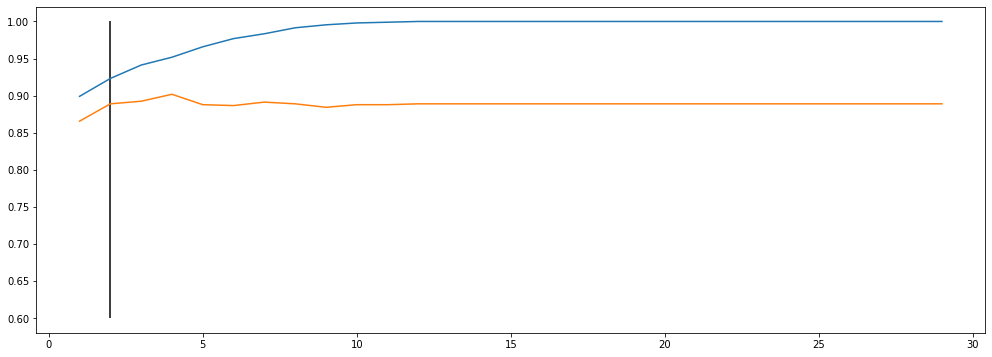

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=range(1,30), y=df_tr.mean())
sns.lineplot(x=range(1,30), y=df_te.mean())
plt.vlines(x=2, ymin=0.6, ymax=1)

In [ ]:
#Treinamento com melhor valor

Xtreino, Xteste, ytreino, yteste = train_test_split(
    df[['0.Área',	'0.Concavidade']], df['Diagnóstico'], test_size=.3,
    stratify=df['Diagnóstico'], random_state=0)

ss = StandardScaler()
Xtreino = ss.fit_transform(Xtreino)
Xteste = ss.transform(Xteste)

dtc = DecisionTreeClassifier(random_state=0, 
                                max_depth=2)
dtc.fit(Xtreino, ytreino)

DecisionTreeClassifier(max_depth=2, random_state=0)

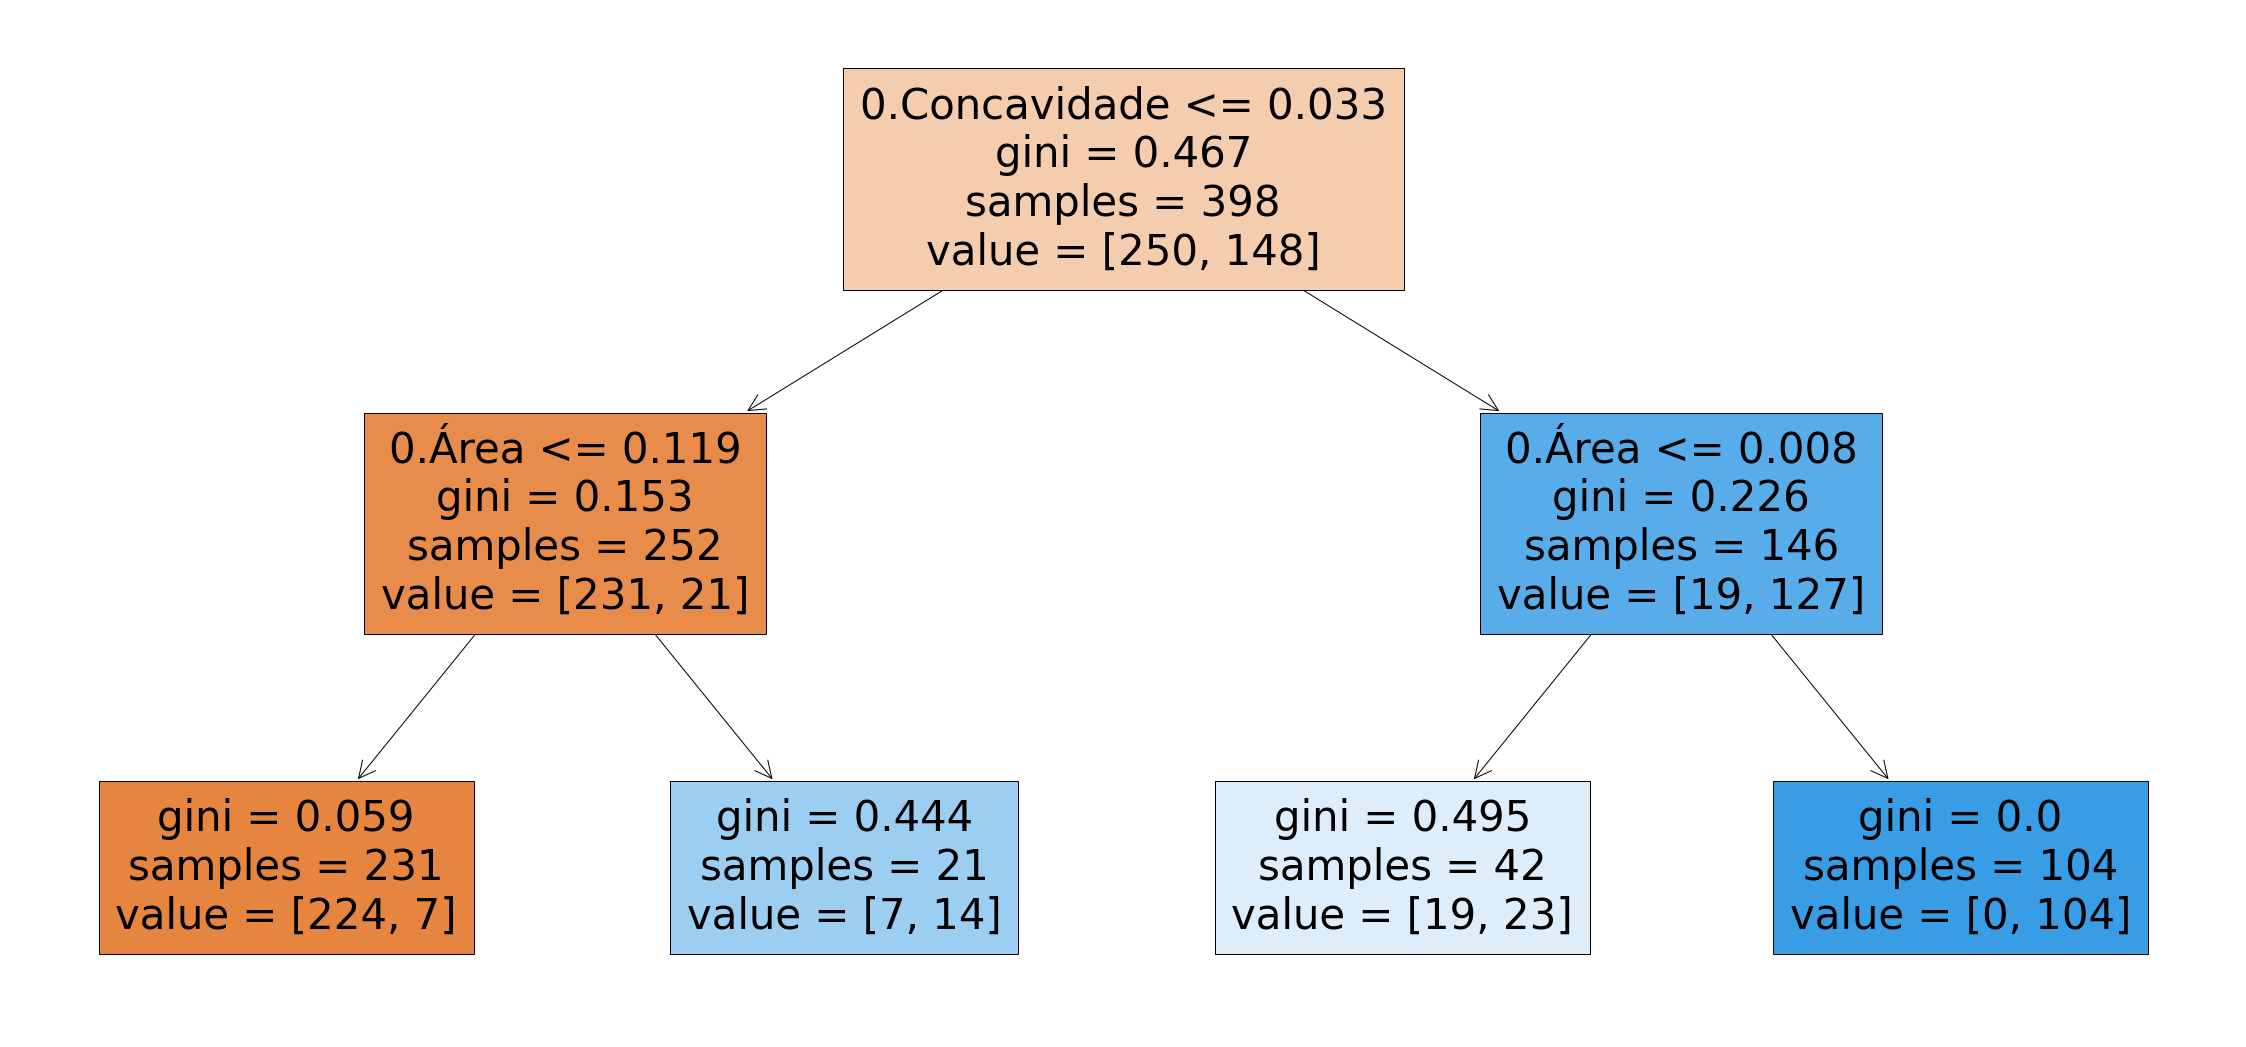

In [ ]:
plot_tree(dtc, filled=True, 
          feature_names=['0.Área',	'0.Concavidade']);

In [ ]:
#Validação com as métricas Acurácia, Precisão e Revocação (Recall)

from sklearn.metrics import classification_report

print(classification_report(yteste, dtc.predict(Xteste)))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       107
           1       0.82      0.92      0.87        64

    accuracy                           0.89       171
   macro avg       0.88      0.90      0.89       171
weighted avg       0.90      0.89      0.90       171



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


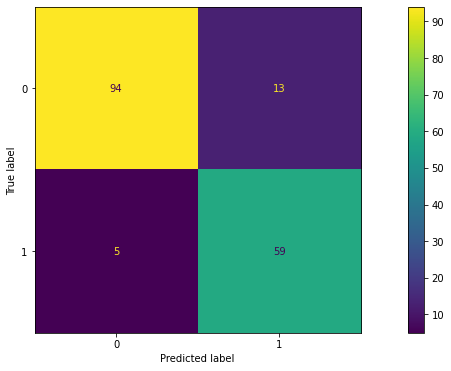

In [ ]:
#Validação com Matriz de Confusão

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtc, Xteste, yteste)

In [ ]:
colunas = ['id', 'Diagnóstico']

caracteristicas = [
                                     'Raio',
                                     'Textura',
                                     'perímetro',
                                     'Área',
                                     'Suavidade',
                                     'Estanqueidade',
                                     'Concavidade',
                                     'junta côncava',
                                     'simetria', 
                                     'Dimensão fractal'
                                     ]

for a in range(3):
  for b in caracteristicas:
    colunas.append(f"{a}.{b}")

df = pd.read_csv("wdbc.data", names=colunas )

df = df[ ['Diagnóstico', '0.Área',	'0.Concavidade'] ]
df.describe()

,0.Área,0.Concavidade
count,569.000000,569.000000
mean,654.889104,0.088799
std,351.914129,0.079720
min,143.500000,0.000000
25%,420.300000,0.029560
50%,551.100000,0.061540
75%,782.700000,0.130700
max,2501.000000,0.426800


In [ ]:
ss = StandardScaler()
df[ ['0.Área',	'0.Concavidade'] ] = \
ss.fit_transform(df[ ['0.Área',	'0.Concavidade'] ])

In [ ]:
df.head()

,Diagnóstico,0.Área,0.Concavidade
0,M,0.984375,2.652874
1,M,1.908708,-0.023846
2,M,1.558884,1.363478
3,M,-0.764464,1.915897
4,M,1.826229,1.371011


In [ ]:
df = df.sample(frac=1)

In [ ]:
dtc = DecisionTreeClassifier(random_state=0,
                                 max_depth=2)
dtc.fit(df[ ['0.Área',	'0.Concavidade'] ], df['Diagnóstico'])

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
import pickle

#arquivo = open("objetos.pkl", "wb")
#pickle.dump([ss, dtc], arquivo)
#arquivo.close()

#ou

with open("objetos.pkl", "wb") as arquivo:
  pickle.dump([ss, dtc], arquivo)

In [ ]:
df.describe()

,0.Área,0.Concavidade
count,5.690000e+02,5.690000e+02
mean,-2.310200e-16,2.526782e-17
std,1.000880e+00,1.000880e+00
min,-1.454443e+00,-1.114873e+00
25%,-6.671955e-01,-7.437479e-01
50%,-2.951869e-01,-3.422399e-01
75%,3.635073e-01,5.260619e-01
max,5.250529e+00,4.243589e+00
